**Nithin Rosarieo**

**Oasis Internship**

**Project :** **Car Price Prediction**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [8]:
data['Car_Name'].nunique()

98

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
data['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [12]:
data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [13]:
data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [14]:
data['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

**Label Encoding**

In [15]:
cat_cols = ['Car_Name','Fuel_Type','Selling_type','Transmission']

le = LabelEncoder()
for col in cat_cols:
  data[col] = le.fit_transform(data[col])

data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [16]:
data.describe()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,62.571429,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,25.573535,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,0.000000,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,69.000000,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,82.000000,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,97.000000,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


**Outlier Map**

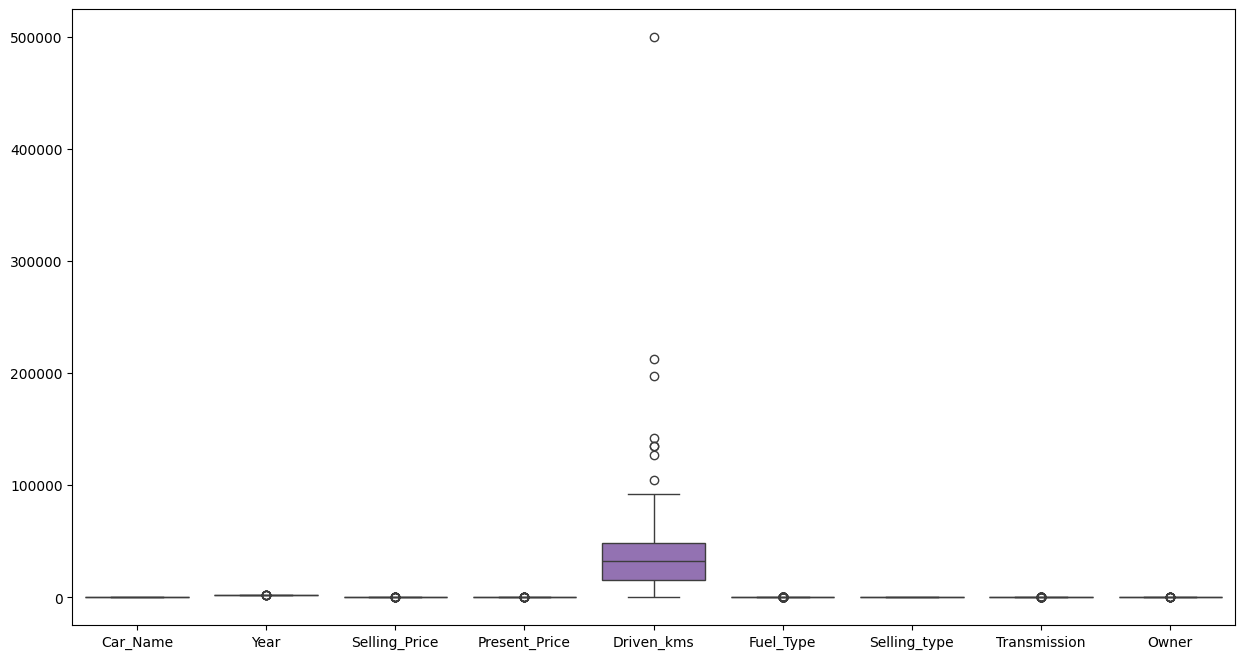

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data,width=0.8)
plt.show()

**Correlation Map**

<Axes: >

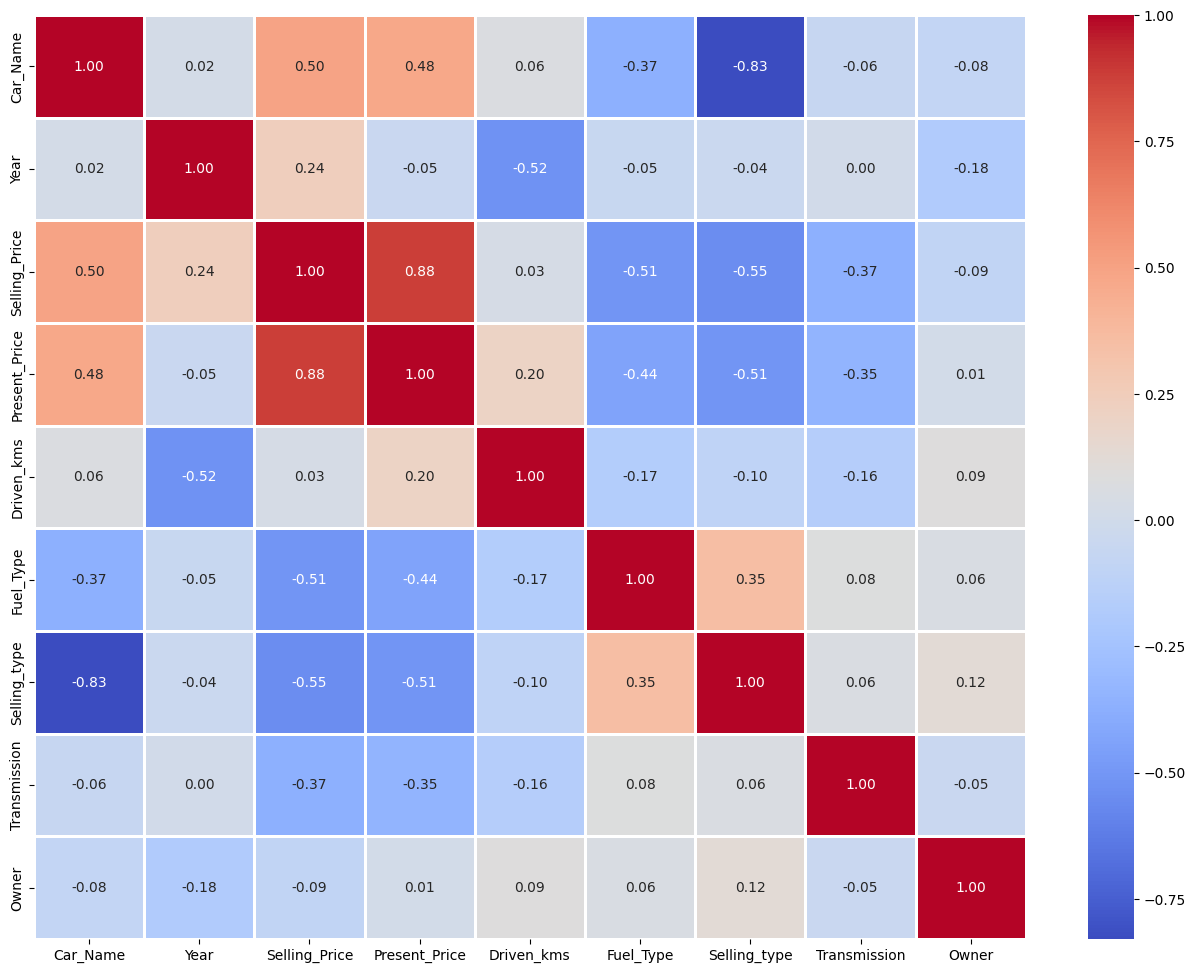

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,fmt='1.2f',annot_kws={'size':10},linewidth=1,cmap='coolwarm')

**Features and Targets**

In [19]:
x=data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

**Linear Regression**

In [21]:
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.1605611758363605
Mean Squared Error: 3.3125494886060967
R-squared: 0.847307011183511


**Decision Tree Regressor**

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.6596721311475409
Mean Squared Error: 1.3717803278688523
R-squared: 0.9367673633307443


**Random Forest Regressor**

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

rf.fit(x_train, y_train)
pred = rf.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.6552934426229511
Mean Squared Error: 1.8035960063934438
R-squared: 0.916862686646356


**Gradient Boosting Regressor**

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()

gbr.fit(x_train, y_train)
pred = gbr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.5770798110832027
Mean Squared Error: 1.1355325525493503
R-squared: 0.9476572772894216


**XGB Regressor**

In [25]:
from xgboost import XGBRegressor

xgb= XGBRegressor()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.5956531961433223
Mean Squared Error: 1.4065222466122882
R-squared: 0.9351659238870766


**Performance of Models**

In [29]:
import plotly.express as px

models = ['LR', 'DTR', 'RFR', 'GBR', 'XGB']
r2_scores = [0.847, 0.936, 0.916, 0.947, 0.935]
df = {'Model': models, 'R2 Score': r2_scores}
df = pd.DataFrame(df)
fig = px.bar(df, x='Model', y='R2 Score', color='Model', title='R2 Score by Model',template='plotly_dark')
fig.update_layout(width=1000, height=500)
fig.show()

**Samples**

In [28]:
gbr= GradientBoostingRegressor()

gbr.fit(x_train, y_train)
pred = gbr.predict(x_test)
out = pd.DataFrame({"Actual Price" :  y_test, "Predicted Price" : pred, "Difference" : abs(y_test - pred)})
Result = data.merge(out, left_index =True, right_index = True)
Result[['Actual Price','Predicted Price','Difference']].sample(20)

,Actual Price,Predicted Price,Difference
154,0.50,0.675056,0.175056
206,5.75,5.271677,0.478323
248,4.00,2.922007,1.077993
298,3.35,2.664391,0.685609
218,6.45,5.538839,0.911161
285,7.40,7.647074,0.247074
230,6.15,5.404971,0.745029
62,18.75,22.343923,3.593923
192,0.20,0.141922,0.058078
176,0.35,0.592365,0.242365
